# Show new bathy improvement
## comparison of "v201905" to "v202111"

In [1]:
import cmocean.cm as cm
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import xarray as xr

In [2]:
def read_pieces(pieces):
    temp1 = pd.read_csv(pieces[0])
    if 'ferry' in pieces[0]:
        temp1['k'] = 1.5
    for piece in pieces[1:]:
        nextpiece = pd.read_csv(piece)
        if 'ferry' in piece:
            nextpiece['k'] = 1.5
        temp1 = pd.concat([temp1, nextpiece], ignore_index=True)
    return temp1

In [3]:
def cleanup_ferry(temp3):
    return temp3[((temp3.SA > 0.2) | (temp3.mod_vosaline - temp3.SA < 20)) & ((temp3.Lon > -123.8) | (temp3.SA > 14))]

In [4]:
pieces = (
         ['/data/sallen/results/MEOPAR/202111/ObsModel//ObsModel_201905R_ferry_20190101_20191231.csv']
         )

In [5]:
temp2 = read_pieces(pieces)
temp2['SA'] = temp2['salinity (g/kg)']
temp2.drop(columns='Unnamed: 0', inplace=True)
temp2.drop_duplicates(inplace=True)

In [6]:
pieces = (
         ['/data/sallen/results/MEOPAR/202111/ObsModel//ObsModel_202111_ferry_20190101_20191231.csv']
         )

In [7]:
temp3 = read_pieces(pieces)
temp3['SA'] = temp3['salinity (g/kg)']
temp3.drop(columns='Unnamed: 0', inplace=True)
temp3.drop_duplicates(inplace=True)
temp3 = cleanup_ferry(temp3)

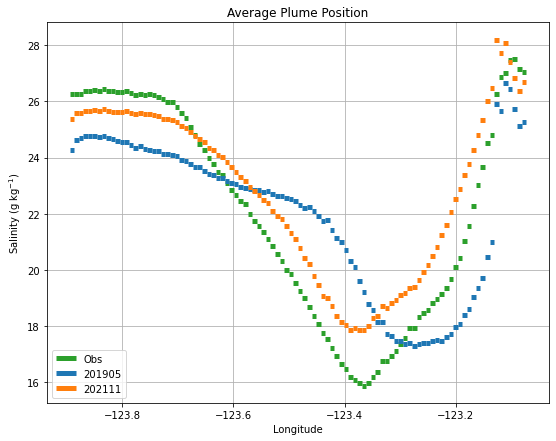

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))
bin_means, bin_edges, binnumber = stats.binned_statistic(temp2.Lon, temp2.SA, 'mean', bins=100)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='tab:green', lw=5,
               label='Obs');
bin_means, bin_edges, binnumber = stats.binned_statistic(temp2.Lon, temp2.mod_vosaline, 'mean', bins=100)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='tab:blue', lw=5,
               label='201905');
bin_means, bin_edges, binnumber = stats.binned_statistic(temp3.Lon, temp3.mod_vosaline, 'mean', bins=100)
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='tab:orange', lw=5,
               label='202111');

ax.set_xlabel('Longitude')
ax.set_ylabel('Salinity (g kg$^{-1}$)')
ax.set_title('Average Plume Position')
plt.grid();
plt.legend(loc='lower left');